<a href="https://colab.research.google.com/github/eddercipras/Tesis/blob/main/Interpretacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# UPDATE OF LIBRARY
!pip install tensorflow==2.9.2
!pip install q keras==2.9.0

In [ ]:
import pandas as pd
import plotly.express as px
import pickle
import os
import tensorflow as tf

In [ ]:
#for check version tensorflow and GPU avalaible
print(tf. __version__)
tf.test.gpu_device_name()
#!nvidia-smi

2.12.0


'/device:GPU:0'

# 1. Ingesta de Logs

# 1.1. Listamos todos los logs en la carpeta de logs y establecemos su ruta

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_logs = "/content/drive/MyDrive/project/logs"
logs = os.listdir(path_logs)
full_logs = [os.path.join(path_logs, log) for log in logs]

## 1.2. Los cargamos en un dataframe todos juntos

In [ ]:
data_logs = []
for full_log, log in zip(full_logs, logs):
  with open(full_log, "rb") as file_pi:
    history = pd.DataFrame(pickle.load(file_pi))
    history["model"] = log
    data_logs.append(history)

data_logs = pd.concat(data_logs)
data_logs

,loss,accuracy,val_loss,val_accuracy,lr,model
0,6.529956,0.905016,4.834826,0.853540,0.00100,DenseNet201-20230610-043821
1,3.696426,0.966562,3.521076,0.952473,0.00100,DenseNet201-20230610-043821
2,2.645936,0.979404,3.997584,0.946654,0.00100,DenseNet201-20230610-043821
3,1.915097,0.980373,1.861350,0.965082,0.00100,DenseNet201-20230610-043821
4,1.413942,0.984735,1.166743,0.987391,0.00100,DenseNet201-20230610-043821
...,...,...,...,...,...,...
45,0.124032,0.999273,0.119646,0.995150,0.00004,MobileNetV220230611-031218
46,0.119363,0.999273,0.119688,0.995150,0.00004,MobileNetV220230611-031218
47,0.116267,0.999515,0.118772,0.995150,0.00004,MobileNetV220230611-031218
48,0.117596,0.999758,0.118841,0.995150,0.00004,MobileNetV220230611-031218


# 2. Revisión de los entrenamientos

## 2.1. Precisión máxima:
es la máxima precisión obtenida por cada modelo y las epochs que le tomó lograrlo: ResNet50 logra la mayor precisión en el menor número de epochs, pero es el modelo más pesado; aunque no el que tiene el mayor número de parámetros

In [ ]:
effort = data_logs.groupby("model")["val_accuracy"].agg(["max", "idxmax"])
effort["epoch"] = effort["idxmax"] + 1
effort.drop("idxmax", axis=1, inplace=True)
effort

,max,epoch
model,,
DenseNet201-20230610-043821,0.988361,10
EfficienteNetV2BO-20230610-061923,0.994180,42
MobileNetV220230611-031218,0.996120,42
ResNet50-20230610-074818,0.990301,13


## 2.2. Peso o costo de entrenamiento de los modelos:
Estos son los pesos y números de parámetros de cada modelo: lo que cuesta entrenarlos

In [ ]:
modelos = {"ResNet50": {"size_MB": 50, "parameters_M": 25.6},
           "EfficienteNetV2BO": {"size_MB": 29, "parameters_M": 7.2},
           "MobileNetV2": {"size_MB": 14, "parameters_M": 3.5},
           "DenseNet201": {"size_MB": 80, "parameters_M": 20.2}}
pd.DataFrame(modelos).T

,size_MB,parameters_M
ResNet50,50.0,25.6
EfficienteNetV2BO,29.0,7.2
MobileNetV2,14.0,3.5
DenseNet201,80.0,20.2


# 3. Curvas de entenamiento
## 3.1. Loss

In [ ]:
data_logs["epoch"] = data_logs.index + 1
fig = px.line(data_logs, x="epoch", y=["val_loss"], color="model", template="plotly_white", title="val_loss")
fig.show()

## 3.2. Accuracy o precisión

In [ ]:
fig = px.line(data_logs, x="epoch", y=["val_accuracy"], color="model", template="plotly_white", title="val_accuracy")
fig.update_layout(title_x=0.5)
fig.show()

# 4. Predicciones

In [ ]:
import keras
import tensorflow

## 4.1. Tomamos el mejor modelo para hacer las predicciones

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/project/models/DenseNet201.10-0.99.h5")

## 4.2. Cargamos imágenes no vistas por el modelo y realizamos predicciones sobre ellas

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning:

pylab import has clobbered these variables: ['log']
`%matplotlib` prevents importing * from pylab and numpy



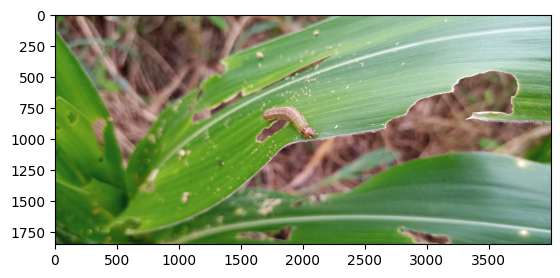

1/1 [==============================] - 13s 13s/step
This image is:
 0.97 Armyworm
 0.01 percent Blight
 0.01 percent Common_Rust
 0.01 Healthy


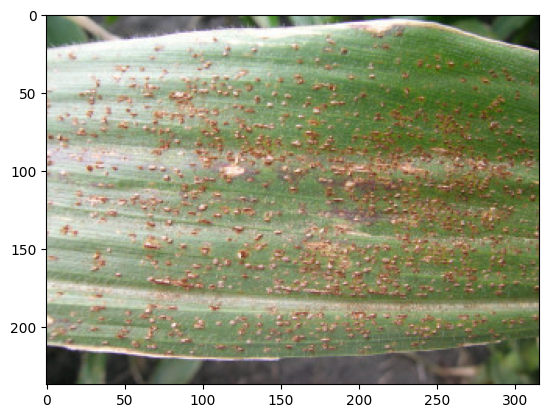

1/1 [==============================] - 0s 81ms/step
This image is:
 0.02 Armyworm
 0.02 percent Blight
 0.95 percent Common_Rust
 0.01 Healthy


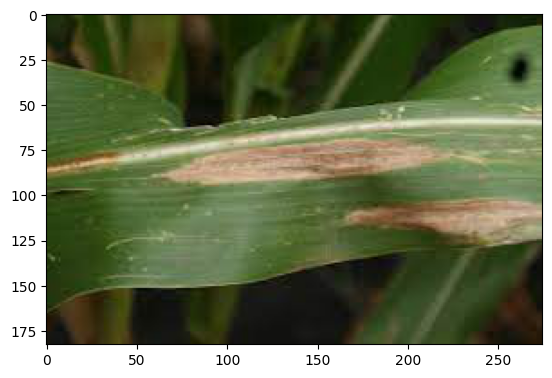

1/1 [==============================] - 0s 93ms/step
This image is:
 0.01 Armyworm
 0.98 percent Blight
 0.01 percent Common_Rust
 0.00 Healthy


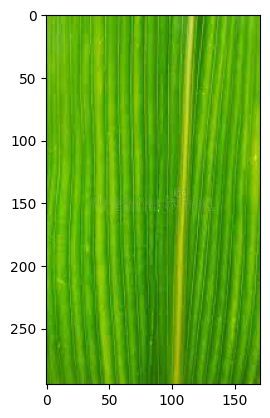

1/1 [==============================] - 0s 37ms/step
This image is:
 0.10 Armyworm
 0.09 percent Blight
 0.07 percent Common_Rust
 0.73 Healthy


In [ ]:
%pylab inline
images = ["/content/drive/MyDrive/project/data/test2/Armyworm.jpg",
          "/content/drive/MyDrive/project/data/test2/common_rust.jpg",
           "/content/drive/MyDrive/project/data/test2/blight.jpeg",
          "/content/drive/MyDrive/project/data/test2/Healthy.jpeg"]

for image in images:
  img_path = image
  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  img = mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  plt.show();
  img = tensorflow.keras.utils.load_img(img_path, target_size=(240, 240))
  img_array = tensorflow.keras.utils.img_to_array(img)
  img_array = tensorflow.expand_dims(img_array, 0)  # Create batch axis

  predictions = model.predict(img_array)
  score = predictions[0]
  print(
      f"This image is:\n {score[0]:.2f} Armyworm\n {score[1]:.2f} percent Blight\n {score[2]:.2f} percent Common_Rust\n {score[3]:.2f} Healthy")
